## CASchools Predicting score based on student teacher ratio

This notebook provides an example of how ML algorithm(Regression) can be used to predict score of a school of a particular district using various variables. 

Let's say you want to understand how many teachers you need to have for each school in order to improve average score of the school. In other words, what should be minimum/optimum class size that can help achieve good score. 

For CASchools MetaData Information

https://rdrr.io/cran/AER/man/CASchools.html

## Import Packages

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
import statsmodels.formula.api as smf

## Read Data

In [6]:
caschools_dat = pd.read_csv('/Users/pallavichandra/Desktop/Rprojects/data/CASchools.csv', index_col = 0)

caschools_dat

,district,school,county,grades,students,teachers,calworks,lunch,computer,expenditure,income,english,read,math
1,75119,Sunol Glen Unified,Alameda,KK-08,195,10.900000,0.510200,2.040800,67,6384.911133,22.690001,0.000000,691.599976,690.000000
2,61499,Manzanita Elementary,Butte,KK-08,240,11.150000,15.416700,47.916698,101,5099.380859,9.824000,4.583333,660.500000,661.900024
3,61549,Thermalito Union Elementary,Butte,KK-08,1550,82.900002,55.032299,76.322601,169,5501.954590,8.978000,30.000002,636.299988,650.900024
4,61457,Golden Feather Union Elementary,Butte,KK-08,243,14.000000,36.475399,77.049202,85,7101.831055,8.978000,0.000000,651.900024,643.500000
5,61523,Palermo Union Elementary,Butte,KK-08,1335,71.500000,33.108601,78.427002,171,5235.987793,9.080333,13.857677,641.799988,639.900024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,68957,Las Lomitas Elementary,San Mateo,KK-08,984,59.730000,0.101600,3.556900,195,7290.338867,28.716999,5.995935,700.900024,707.700012
417,69518,Los Altos Elementary,Santa Clara,KK-08,3724,208.479996,1.074100,1.503800,721,5741.462891,41.734108,4.726101,704.000000,709.500000
418,72611,Somis Union Elementary,Ventura,KK-08,441,20.150000,3.563500,37.193802,45,4402.831543,23.733000,24.263039,648.299988,641.700012
419,72744,Plumas Elementary,Yuba,KK-08,101,5.000000,11.881200,59.405899,14,4776.336426,9.952000,2.970297,667.900024,676.500000


## Effect of student teacher ratio on score

### Create features/independent variables of our interest

In [24]:
caschools_dat['stratio'] = caschools_dat['students']/caschools_dat['teachers']
caschools_dat['score'] = (caschools_dat['read'] + caschools_dat['math'])/2

caschools_dat

,district,school,county,grades,students,teachers,calworks,lunch,computer,expenditure,income,english,read,math,stratio,score
1,75119,Sunol Glen Unified,Alameda,KK-08,195,10.900000,0.510200,2.040800,67,6384.911133,22.690001,0.000000,691.599976,690.000000,17.889909,690.799988
2,61499,Manzanita Elementary,Butte,KK-08,240,11.150000,15.416700,47.916698,101,5099.380859,9.824000,4.583333,660.500000,661.900024,21.524664,661.200012
3,61549,Thermalito Union Elementary,Butte,KK-08,1550,82.900002,55.032299,76.322601,169,5501.954590,8.978000,30.000002,636.299988,650.900024,18.697225,643.600006
4,61457,Golden Feather Union Elementary,Butte,KK-08,243,14.000000,36.475399,77.049202,85,7101.831055,8.978000,0.000000,651.900024,643.500000,17.357143,647.700012
5,61523,Palermo Union Elementary,Butte,KK-08,1335,71.500000,33.108601,78.427002,171,5235.987793,9.080333,13.857677,641.799988,639.900024,18.671329,640.850006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,68957,Las Lomitas Elementary,San Mateo,KK-08,984,59.730000,0.101600,3.556900,195,7290.338867,28.716999,5.995935,700.900024,707.700012,16.474134,704.300018
417,69518,Los Altos Elementary,Santa Clara,KK-08,3724,208.479996,1.074100,1.503800,721,5741.462891,41.734108,4.726101,704.000000,709.500000,17.862625,706.750000
418,72611,Somis Union Elementary,Ventura,KK-08,441,20.150000,3.563500,37.193802,45,4402.831543,23.733000,24.263039,648.299988,641.700012,21.885856,645.000000
419,72744,Plumas Elementary,Yuba,KK-08,101,5.000000,11.881200,59.405899,14,4776.336426,9.952000,2.970297,667.900024,676.500000,20.200000,672.200012


## Run the SLR to predict score based on given student teacher ratio. 

In [23]:
slm_mod = smf.ols('score ~ stratio', data = caschools_dat).fit(cov_type = 'HC3')

slm_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     18.90
Date:                Fri, 19 Jul 2024   Prob (F-statistic):           1.73e-05
Time:                        12:12:43   Log-Likelihood:                -1822.2
No. Observations:                 420   AIC:                             3648.
Df Residuals:                     418   BIC:                             3657.
Df Model:                           1                                         
Covariance Type:                  HC3                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    698.9329     10.461     66.816      0.000     678.431     719.435
stratio       -2.2798      0.524     -4.348      0.000      -3.308      -1.252
==============================================================================
Omnibus:                        5.390   Durbin-Watson:                   0.129
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                3.589
Skew:                          -0.012   Prob(JB):                        0.166
Kurtosis:                       2.548   Cond. No.                         207.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

## Equation

* score = 698.9329 - -2.27*stratio

In [16]:
caschools_dat_sorted = caschools_dat.sort_values(['stratio'])

## Plot the student teacher ratio and score

<Axes: xlabel='stratio'>

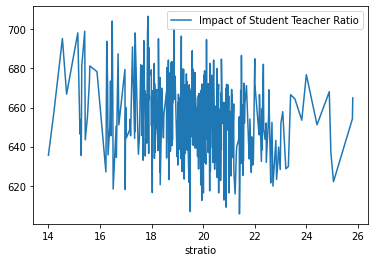

In [20]:
#plt.figure(figsize=(20, 15))
caschools_dat_sorted.plot(x='stratio', y = 'score', label = 'Impact of Student Teacher Ratio')


If you observe the figure you can clearly see that if the Student Teacher ratio increases from 22 the score of the students starts reducing. 

## Predict the results

In [28]:
## Let's say district 61499 maintained a ratio of 22, what will the predicted score ?

score = 698.9329 - (2.27*22)


648.9929

The predicted score of a school having student teacher ratio as 22 will be around 649.

## Build confidence around it

How can we say the score will be 649 only, given student teacher ratio as 22. To build confidence around this uncertainity we will see the confidence interval from the equation.  

## Equations of the lower confidence interval and upper confidence interval


* <font color='blue'>  score = 678.431 - 3.308*stratio </font>

* <font color='blue'> score = 719.435 - 1.252*stratio </font>

In [29]:
score_lower = 678.431 - 3.308*22
score_upper = 719.435 - 1.252*22

In [33]:
print("Confidence Level: [", np.round(score_lower, 2), "-",np.round(score_upper, 2), ']')

Confidence Level: [ 605.66 - 691.89 ]


Thus, the average score will be in between 605.66 - 691.89, if student teacher ratio is maintained at 22. 

## Multi-Linear Regression

Is student teacher ratio only thing that affects score of a school? 
* Are there any other variables?
* What about % of english learners, income of the district?

In [40]:
reg_mod = smf.ols('score ~ stratio + income', data = caschools_dat).fit(cov_type = 'HC3')

reg_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     121.3
Date:                Fri, 19 Jul 2024   Prob (F-statistic):           3.02e-42
Time:                        14:58:13   Log-Likelihood:                -1682.9
No. Observations:                 420   AIC:                             3372.
Df Residuals:                     417   BIC:                             3384.
Df Model:                           2                                         
Covariance Type:                  HC3                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    638.7292      7.374     86.615      0.000     624.276     653.183
stratio       -0.6487      0.357     -1.817      0.069      -1.349       0.051
income         1.8391      0.120     15.349      0.000       1.604       2.074
==============================================================================
Omnibus:                        2.579   Durbin-Watson:                   0.643
Prob(Omnibus):                  0.275   Jarque-Bera (JB):                2.583
Skew:                          -0.152   Prob(JB):                        0.275
Kurtosis:                       2.765   Cond. No.                         290.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

## The new equation

score = 638.729 - 0.6487*stratio + 1.8391*income

In [41]:
stratio = 22
income = 10.000

In [42]:
score = 638.729 - 0.6487*stratio + 1.8391*income
score

642.8486

## Equations of the lower confidence interval and upper confidence interval


* <font color='blue'>  score = 624.276 - 1.349* stratio + 0.051*income </font>

* <font color='blue'> score = 653.183 - 1.604* stratio + 2.074*income </font>

In [43]:
score_lower = 624.276 - 1.349* stratio + 0.051*income
score_upper = 653.183 - 1.604* stratio + 2.074*income

In [44]:
print("Confidence Level: [", np.round(score_lower, 2), "-",np.round(score_upper, 2), ']')

Confidence Level: [ 595.11 - 638.64 ]
